### For the same statistical areas, plot salary of postdocs and salary of everyone else

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary_versus_per_capita.pickle')

In [4]:
university_df[:20]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER,regional_income
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079,74762.608722
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186,95460.436662
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378,74762.608722
3,6.0,Columbia University,USA,4.0,13.0,6.0,9.0,13.0,13.0,11.0,12.0,4.0,96.14,2015.0,190150,Columbia University in the City of New York,Columbia University,West 116 St and Broadway,New York,NY,10027,36,2,Lee C. Bollinger,President,2128541754,603800000,049179401|621889815,270700,1,www.columbia.edu/,www.columbia.edu/content/admissions,sfs.columbia.edu/,https://www.columbia.edu/content/admissions-of...,cc-seas.financialaid.columbia.edu/estimate-cost,gs.columbia.edu/veterans,,https://health.columbia.edu/content/disability...,2,1,2,9,1,1,11,1,2,2,1,2,11,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,15,6,17,15,15,15,2,5,2,-2,-2,35620,1,408,-2,36061,New York Co

In [5]:
all_ranked = university_df[university_df.institution.isnull()==False]

In [6]:
len(all_ranked[all_ranked.RPP_all.isnull()])

14

In [7]:
len(all_ranked[university_df.N_SALARIES < 10])

<ipython-input-7-6182bebd9ad6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(all_ranked[university_df.N_SALARIES < 10])


76

In [8]:
len(all_ranked)

229

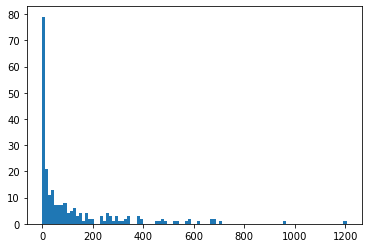

In [9]:
plt.hist(all_ranked.N_SALARIES, bins = 100);

In [10]:
np.sum(university_df.N_SALARIES)

28161

In [11]:
university_df = university_df[university_df.N_SALARIES >= 10]

In [12]:
len(university_df)

165

In [13]:
import seaborn as sns

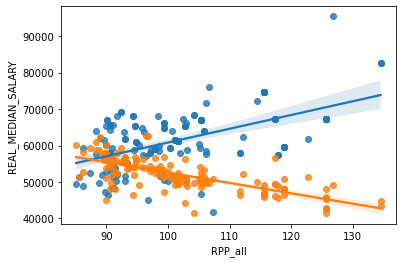

In [14]:
fig, ax = plt.subplots()
sns.regplot(x="RPP_all", y="regional_income", data=university_df, ax = ax)
sns.regplot(x="RPP_all", y="REAL_MEDIAN_SALARY", data=university_df, ax = ax)

In [15]:
median_salary_by_area = pd.read_pickle(DATA_DIR/ 'median_salary_by_area.pickle')

In [16]:
median_salary_by_area[:3]

,area,area_title,median_annual,mean_annual,RPP,GeoFips,mean_scaled,median_scaled
0,10180,"Abilene, TX",32530.0,41760.0,90.3,10180,46245.847176,36024.363234
1,10420,"Akron, OH",38640.0,49400.0,90.0,10420,54888.888889,42933.333333
2,10500,"Albany, GA",31320.0,42640.0,82.8,10500,51497.584541,37826.086957


In [17]:
university_df = university_df.merge(median_salary_by_area[['GeoFips', 'median_scaled', 'mean_scaled']], how='left', left_on = "CBSA", right_on = 'GeoFips')

In [18]:
pal = sns.color_palette('Set1')
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

[None, None, None, None]

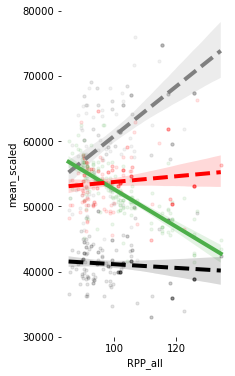

In [19]:
s = 10
alpha = .1
lw=4
fig, ax = plt.subplots(figsize=(3,6))
#
sns.regplot(
    x="RPP_all",
    y="regional_income",
    data=university_df,
    ax=ax,
    color="grey",
    scatter_kws={
        "alpha": alpha,
        "s": s,
    },
    line_kws = {
        'lw':lw,
        'ls': 'dashed'
    }
)
sns.regplot(
    x="RPP_all",
    y="REAL_MEDIAN_SALARY",
    data=university_df,
    ax=ax,
    color = pal[2],
    scatter_kws={
        "alpha": alpha,
        "s": s,
    },
    line_kws = {
        'lw':lw,
        
    }
)
sns.regplot(
    x="RPP_all",
    y="median_scaled",
    data=university_df,
    ax=ax,
    color="black",
    scatter_kws={
        "alpha": alpha,
        "s": s,
    },
    line_kws = {
        'lw':lw,
        'ls': 'dashed'
    }
)
sns.regplot(
    x="RPP_all",
    y="mean_scaled",
    data=university_df,
    ax=ax,
    color="red",
    scatter_kws={
        "alpha": alpha,
        "s": s,
    },
    line_kws = {
        'lw':lw,
        'ls': 'dashed'
    }
)
ax.set_ylim([30000, 80000])
[i.set_linewidth(0.) for i in ax.spines.values()]

In [20]:
from postdocsalary.paths import save_fig, FIGURE_DIR

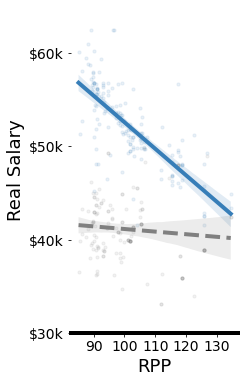

In [21]:
s = 10
alpha = .1
lw=4
fig, ax = plt.subplots(figsize=(3,6))
#

sns.regplot(
    x="RPP_all",
    y="REAL_MEDIAN_SALARY",
    data=university_df,
    ax=ax,
    color = pal[1],
    scatter_kws={
        "alpha": alpha,
        "s": s,
    },
    line_kws = {
        'lw':lw,
        
    }
)
sns.regplot(
    x="RPP_all",
    y="median_scaled",
    data=university_df,
    ax=ax,
    color="grey",
    scatter_kws={
        "alpha": alpha,
        "s": s,
    },
    line_kws = {
        'lw':lw,
        'ls': 'dashed'
    }
)

ax.set_ylim([30000, 65000])
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(0)
ax.set_xticks([90, 100, 110, 120, 130])
ax.set_xlabel('RPP', fontsize=18)
ax.set_ylabel('Real Salary', fontsize=18)
ax.set_yticks([30000, 40000, 50000, 60000])
ax.set_yticklabels(['$30k', '$40k', '$50k', '$60k'], fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)

save_fig(FIGURE_DIR / 'real_salary_postdoc_vs_median')

In [22]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER,regional_income,GeoFips,median_scaled,mean_scaled
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079,74762.608722,NaN,NaN,NaN
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186,95460.436662,41940.0,48918.705604,66266.771902
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378,74762.608722,NaN,NaN,NaN


In [44]:
len(university_df)

153

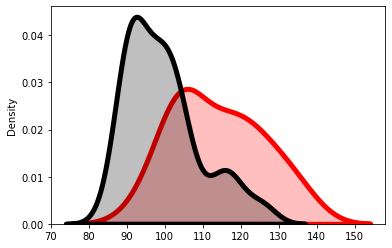

In [23]:
fig, ax = plt.subplots()
ax = sns.kdeplot(
    university_df[university_df.national_rank <= 20].RPP_all.values,
    ax=ax,
    #cumulative=True,
    #kind="ecdf",
    lw=5,
    color='red',
    fill = True,
)
ax = sns.kdeplot(
    university_df[university_df.national_rank > 20].RPP_all.values,
    ax=ax,
    #cumulative=True,
    #kind="ecdf",
    lw=5,
    color='black',
    fill = True,
)

In [24]:
np.nanmin(university_df[university_df.institution.isnull() == False].RPP_all.values), np.nanmax(university_df[university_df.institution.isnull() == False].RPP_all.values)

(85.1, 134.5)

In [25]:
len(university_df)

165

In [26]:
pal = sns.color_palette('Set1')
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [27]:
bins = np.linspace(85, 135, 5)
bins

array([ 85. ,  97.5, 110. , 122.5, 135. ])

In [28]:
np.min(university_df['RPP_all'])

85.1

In [29]:
np.max(university_df['RPP_all'])

134.5

In [33]:
university_df["quartile"] = np.digitize(university_df['RPP_all'], bins)

In [34]:
university_df["top_20"] = university_df.national_rank <=21

In [35]:
university_df[university_df['quartile'] == 5][['institution', 'RPP_all', 'quartile']]

,institution,RPP_all,quartile
110,"Washington State University, Pullman",NaN,5
119,Ohio University,NaN,5
121,University of Wyoming,NaN,5
126,University of Mississippi - Oxford Campus,NaN,5
127,University of Mississippi Medical Center,NaN,5
130,Montana State University - Bozeman,NaN,5
138,Mississippi State University,NaN,5
141,University of Idaho,NaN,5
149,Michigan Technological University,NaN,5


In [36]:
len(university_df)

165

In [37]:
university_df['quartile'] = np.digitize(university_df.RPP_all.values, bins, right=False)

In [38]:
for quartile in np.sort(university_df["quartile"].unique()):
    quartile_dat = university_df[university_df["quartile"] == quartile]
    print(quartile, len(quartile_dat), np.sum(quartile_dat.top_20 == True), np.mean((quartile_dat.top_20 == True)))

1 68 1 0.014705882352941176
2 55 8 0.14545454545454545
3 22 5 0.22727272727272727
4 11 6 0.5454545454545454
5 9 0 0.0


In [39]:
np.unique(university_df['quartile'], return_counts=True)

(array([1, 2, 3, 4, 5]), array([68, 55, 22, 11,  9]))

In [40]:
university_df = university_df[university_df.institution.isnull() == False]

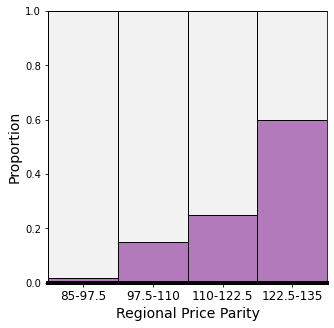

In [41]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(
    data=university_df,
    x="RPP_all",
    hue="top_20",
    multiple="fill",
    bins=bins,
    palette = {
        True: pal[3],
        False: '#EEEEEE'
    },
    ax = ax,
    #kde=True,
    legend = False,
)
ax.set_ylabel('Proportion', fontsize= 14)
ax.set_xticks((bins[:-1] + bins[1:])/2)
ax.set_xticklabels(['85-97.5', '97.5-110', '110-122.5', '122.5-135'], fontsize=12)
ax.set_xlabel('Regional Price Parity', fontsize=14)
ax.spines['bottom'].set_linewidth(4)
save_fig(FIGURE_DIR / 'COL_top-tier')

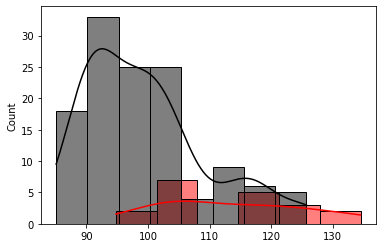

In [42]:
sns.histplot(university_df[university_df.national_rank <=20].RPP_all.values, kde=True, color = 'red')
sns.histplot(university_df[university_df.national_rank > 20].RPP_all.values, kde=True, color = 'k')

(array([ 7., 37., 15., 21., 21.,  4.,  3., 10.,  2.,  5.]),
 array([ 85.1 ,  89.16,  93.22,  97.28, 101.34, 105.4 , 109.46, 113.52,
        117.58, 121.64, 125.7 ]),
 <a list of 10 Patch objects>)

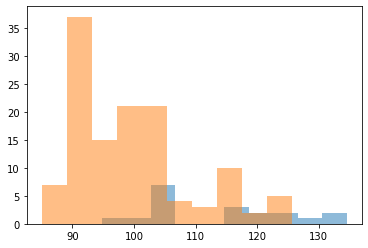

In [43]:
plt.hist(university_df[university_df.national_rank <= 20].RPP_all.values, alpha = 0.5)
plt.hist(university_df[university_df.national_rank > 20].RPP_all.values, alpha = 0.5)